In [1]:
import time
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
# %matplotlib inline
from IPython.display import display,Javascript

## Read files

In [2]:
def read_file(filename, zero_file = False):
    file = open(filename, 'r' )
    
    count = 1
    row_value_arr = [];
    time_list = []
    while(True):
        value = file.readline()

        if (count == 1):
            rows = int(value)
        if (count == 2):
            cols = int(value)
        if (count == 3):
            running_time = value.strip('\n')
            time_list.append(running_time)
        if (count == 4):
            numprocs = int(value)
        if (count == 5):
            loopnum = int(value)
        
        if (value == ""):
            break
            
        if (count > 5):
            tmp = value.strip().strip().strip('\n').split(' ')
            tmp = np.array(tmp, dtype = int)
            row_value_arr.append(tmp) #.astype(int))
        count += 1
        
    out = np.array(row_value_arr)    
    mat_arr.append(out)
    
    if (zero_file):
        return rows, cols, numprocs, loopnum
    else:
        return time_list

In [3]:
def output_all(file_mode):
    file_basis = "/Users/xiexun/Library/Developer/Xcode/DerivedData/MPItest-fpelulxfuqhuobbyaaemekoksomu/Build/Products/Debug/"

    file_latter = file_mode + str(0) + ".txt"
    filename = file_basis + file_latter
    rows, cols, numprocs, loopnum = read_file(filename, True)

    time_list = []
    for i in range(1,loopnum):
        file_latter = file_mode + str(i) + ".txt"
        filename = file_basis + file_latter
        time_list.append(read_file(filename))

    time_arr = np.array(time_list, dtype = float)
    time = time_arr.sum()
    
    return rows, cols, numprocs, loopnum, time

## produce picture

In [4]:
file_mode = "test_grid_ghost/grid_ghost"

mat_arr = []
rows, cols, numprocs, loopnum, time = output_all(file_mode)

print(file_mode , " time consuming : " , time)
print("matrix size : " , rows , " by " , cols)
print("number of loops : " , loopnum)

# print(mat_arr)

test_grid_ghost/grid_ghost  time consuming :  0.004244328400000001
matrix size :  30  by  30
number of loops :  30


<IPython.core.display.Javascript object>


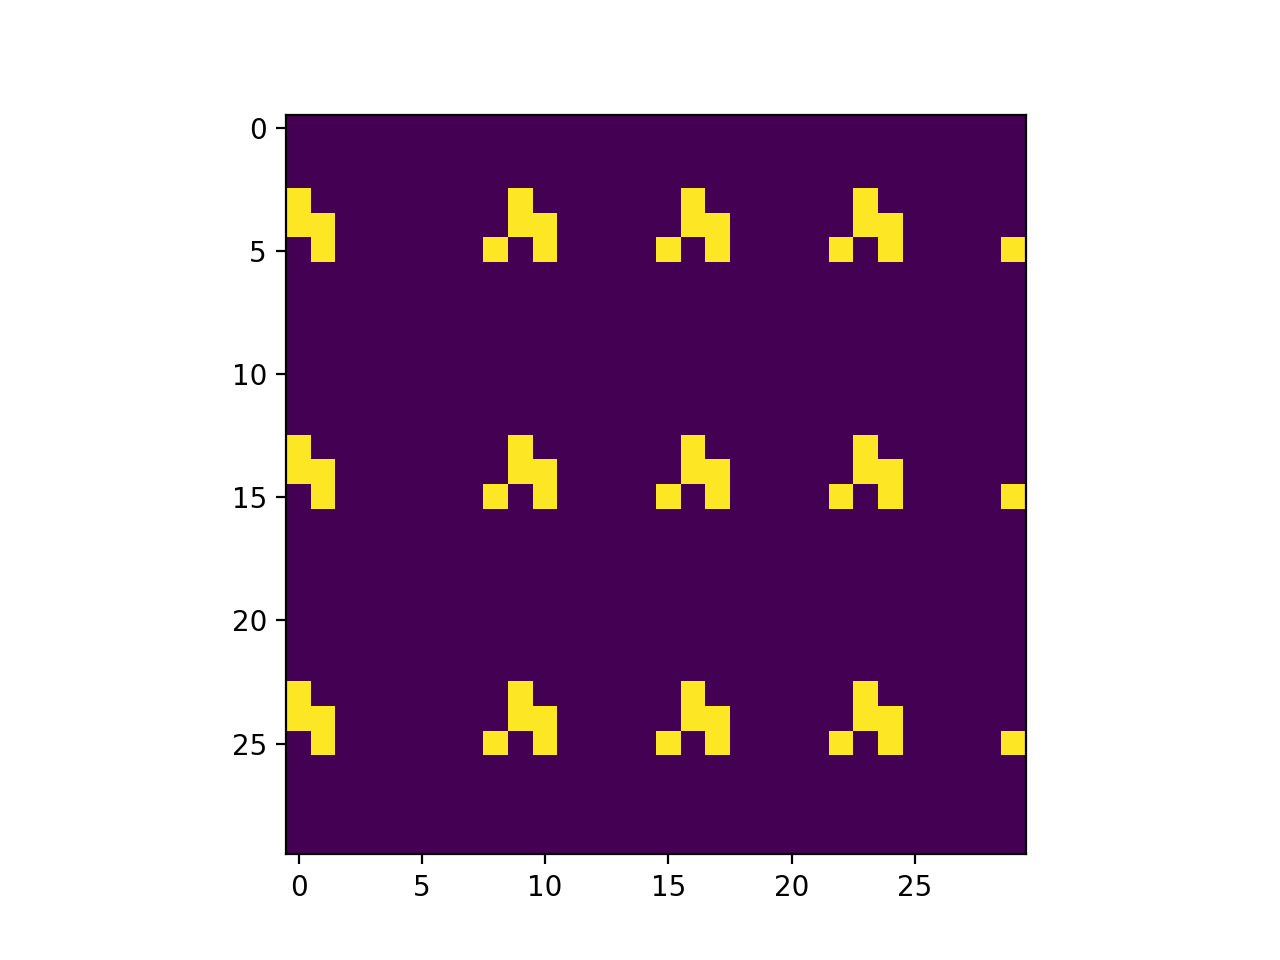

In [5]:
global position
position = 0
# Required line for plotting the animation
%matplotlib notebook
# Initialize the plot of the board that will be used for animation
fig = plt.gcf()

# Show first image - which is the initial board
im = plt.imshow(mat_arr[0])
plt.show()
plt.savefig(fname='game_of_life', dpi=150)

mat_arr.pop(0)

# Helper function that updates the board and returns a new image of
# the updated board animate is the function that FuncAnimation calls
def animate(frame):

    global position
    position += 1
    im.set_data(mat_arr[position])

    return im

# This line creates the animation
anim = animation.FuncAnimation(fig, animate, frames=loopnum, interval=200)

In [6]:
print(file_mode , " time consuming : " , time)
print("matrix size : " , rows , " by " , cols)
print("number of loops : " , loopnum)

test_grid_ghost/grid_ghost  time consuming :  0.004244328400000001
matrix size :  30  by  30
number of loops :  30


In [7]:
global position
position = 0
anim = animation.FuncAnimation(fig, animate, frames=loopnum-3, interval=200)
anim.save('test_grid_ghost.gif')#,writer='imagemagick')

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
